<a href="https://colab.research.google.com/github/AngelTroncoso/Proyecto_telecomx2/blob/main/telecoX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Telecom2 Preveer que clientes tienen mayor probabilidad de cancelar sus servicios**

🎯 Misión  

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.  

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df_normalizado = pd.json_normalize(df)

In [4]:
df = df[df['Churn'].str.strip() != '']

In [5]:
print(df['Churn'].unique())

['No' 'Yes']


In [6]:
df['Churn'].dtype

dtype('O')

In [7]:
df = pd.json_normalize(df.to_dict(orient='records'))
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [8]:
df.shape


(7043, 21)

In [9]:
rename_dict = {
    'customerID': 'ID_cliente',
    'Churn': 'Cancelado',
    'customer.gender': 'Género',
    'customer.SeniorCitizen': 'Adulto_mayor',
    'customer.Partner': 'Tiene_pareja',
    'customer.Dependents': 'Tiene_dependientes',
    'customer.tenure': 'Antigüedad_meses',

    'phone.PhoneService': 'Servicio_telefonía',
    'phone.MultipleLines': 'Líneas_múltiples',

    'internet.InternetService': 'Servicio_internet',
    'internet.OnlineSecurity': 'Seguridad_en_línea',
    'internet.OnlineBackup': 'Respaldo_en_línea',
    'internet.DeviceProtection': 'Protección_dispositivos',
    'internet.TechSupport': 'Soporte_técnico',
    'internet.StreamingTV': 'TV_en_streaming',
    'internet.StreamingMovies': 'Películas_en_streaming',

    'account.Contract': 'Tipo_contrato',
    'account.PaperlessBilling': 'Factura_sin_papel',
    'account.PaymentMethod': 'Método_pago',
    'account.Charges.Monthly': 'Cargo_mensual',
    'account.Charges.Total': 'Cargo_total'
}

In [10]:
df = df.rename(columns=rename_dict)

In [11]:
df.shape

(7043, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_cliente               7043 non-null   object 
 1   Cancelado                7043 non-null   object 
 2   Género                   7043 non-null   object 
 3   Adulto_mayor             7043 non-null   int64  
 4   Tiene_pareja             7043 non-null   object 
 5   Tiene_dependientes       7043 non-null   object 
 6   Antigüedad_meses         7043 non-null   int64  
 7   Servicio_telefonía       7043 non-null   object 
 8   Líneas_múltiples         7043 non-null   object 
 9   Servicio_internet        7043 non-null   object 
 10  Seguridad_en_línea       7043 non-null   object 
 11  Respaldo_en_línea        7043 non-null   object 
 12  Protección_dispositivos  7043 non-null   object 
 13  Soporte_técnico          7043 non-null   object 
 14  TV_en_streaming         

In [13]:
df.isnull().sum()

,0
ID_cliente,0
Cancelado,0
Género,0
Adulto_mayor,0
Tiene_pareja,0
Tiene_dependientes,0
Antigüedad_meses,0
Servicio_telefonía,0
Líneas_múltiples,0
Servicio_internet,0


In [14]:
df['Cargo_total'] = df['Cargo_total'].str.replace(',', '.', regex=False)

In [15]:
df['Cargo_total'] = pd.to_numeric(df['Cargo_total'], errors='coerce')

In [16]:
df.head()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Respaldo_en_línea,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [17]:
df.dtypes

,0
ID_cliente,object
Cancelado,object
Género,object
Adulto_mayor,int64
Tiene_pareja,object
Tiene_dependientes,object
Antigüedad_meses,int64
Servicio_telefonía,object
Líneas_múltiples,object
Servicio_internet,object


In [18]:
for col in df.columns:
    print(f"\n📌 Columna: {col}")
    print(df[col].unique())


📌 Columna: ID_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

📌 Columna: Cancelado
['No' 'Yes']

📌 Columna: Género
['Female' 'Male']

📌 Columna: Adulto_mayor
[0 1]

📌 Columna: Tiene_pareja
['Yes' 'No']

📌 Columna: Tiene_dependientes
['Yes' 'No']

📌 Columna: Antigüedad_meses
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]

📌 Columna: Servicio_telefonía
['Yes' 'No']

📌 Columna: Líneas_múltiples
['No' 'Yes' 'No phone service']

📌 Columna: Servicio_internet
['DSL' 'Fiber optic' 'No']

📌 Columna: Seguridad_en_línea
['No' 'Yes' 'No internet service']

📌 Columna: Respaldo_en_línea
['Yes' 'No' 'No internet service']

📌 Columna: Protección_dispositivos
['No' 'Yes' 'No internet service']

📌 Columna: Soporte_técnico
['Yes' 'No' 'No internet service']

📌 Columna: TV_en_streaming

In [19]:
df['Cancelado'].value_counts(dropna=False)

,count
Cancelado,
No,5174
Yes,1869


In [20]:
df['Género'].value_counts(dropna=False)

,count
Género,
Male,3555
Female,3488


In [21]:
#Asumimos 30 días promedio por mes:
df['Cuentas_Diarias'] = df['Cargo_mensual'] / 30

In [22]:
#validación rápida
print(df[['Cargo_mensual', 'Cuentas_Diarias']].head())

   Cargo_mensual  Cuentas_Diarias
0           65.6         2.186667
1           59.9         1.996667
2           73.9         2.463333
3           98.0         3.266667
4           83.9         2.796667


In [23]:
#Resumen estadístico
df['Cuentas_Diarias'].describe()

,Cuentas_Diarias
count,7043.000000
mean,2.158723
std,1.003002
min,0.608333
25%,1.183333
50%,2.345000
75%,2.995000
max,3.958333


In [24]:
df.head()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#2.Transformar datos para Machine Learning

In [25]:
#separar datos tipos object y darle una variable de asignacion para extración con cikitlearn
obj_cols = df.select_dtypes(include='object').columns
print("Columnas tipo object:\n", obj_cols)

Columnas tipo object:
 Index(['ID_cliente', 'Cancelado', 'Género', 'Tiene_pareja',
       'Tiene_dependientes', 'Servicio_telefonía', 'Líneas_múltiples',
       'Servicio_internet', 'Seguridad_en_línea', 'Respaldo_en_línea',
       'Protección_dispositivos', 'Soporte_técnico', 'TV_en_streaming',
       'Películas_en_streaming', 'Tipo_contrato', 'Factura_sin_papel',
       'Método_pago'],
      dtype='object')


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in obj_cols:
    try:
        df[col] = le.fit_transform(df[col])
    except:
        print(f"No se pudo transformar: {col}")

In [27]:
df.nunique()

,0
ID_cliente,7043
Cancelado,2
Género,2
Adulto_mayor,2
Tiene_pareja,2
Tiene_dependientes,2
Antigüedad_meses,73
Servicio_telefonía,2
Líneas_múltiples,3
Servicio_internet,3


In [28]:
df.head()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
0,0,0,0,0,1,1,9,1,0,0,...,0,2,2,0,1,1,3,65.6,593.30,2.186667
1,1,0,1,0,0,0,9,1,2,0,...,0,0,0,2,0,0,3,59.9,542.40,1.996667
2,2,1,1,0,0,0,4,1,0,1,...,2,0,0,0,0,1,2,73.9,280.85,2.463333
3,3,1,1,1,1,0,13,1,0,1,...,2,0,2,2,0,1,2,98.0,1237.85,3.266667
4,4,1,0,1,1,0,3,1,0,1,...,0,2,2,0,0,1,3,83.9,267.40,2.796667


In [29]:
df.describe()

,ID_cliente,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,3521.000000,0.265370,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,2.158723
std,2033.283305,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,1.183333
50%,3521.000000,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,2.345000
75%,5281.500000,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,2.995000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,3.958333


In [30]:
df.dtypes

,0
ID_cliente,int64
Cancelado,int64
Género,int64
Adulto_mayor,int64
Tiene_pareja,int64
Tiene_dependientes,int64
Antigüedad_meses,int64
Servicio_telefonía,int64
Líneas_múltiples,int64
Servicio_internet,int64


#**Correlacion de Pearson**

In [31]:
df = df.drop("ID_cliente",axis=1)

In [32]:
df

,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,Seguridad_en_línea,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
0,0,0,0,1,1,9,1,0,0,0,...,0,2,2,0,1,1,3,65.60,593.30,2.186667
1,0,1,0,0,0,9,1,2,0,0,...,0,0,0,2,0,0,3,59.90,542.40,1.996667
2,1,1,0,0,0,4,1,0,1,0,...,2,0,0,0,0,1,2,73.90,280.85,2.463333
3,1,1,1,1,0,13,1,0,1,0,...,2,0,2,2,0,1,2,98.00,1237.85,3.266667
4,1,0,1,1,0,3,1,0,1,0,...,0,2,2,0,0,1,3,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,0,0,2,...,0,2,0,0,1,0,3,55.15,742.90,1.838333
7039,1,1,0,1,0,22,1,2,1,0,...,0,0,0,2,0,1,2,85.10,1873.70,2.836667
7040,0,1,0,0,0,2,1,0,0,0,...,0,0,0,0,0,1,3,50.30,92.75,1.676667
7041,0,1,0,1,1,67,1,0,0,2,...,2,2,0,2,2,0,3,67.85,4627.65,2.261667


In [33]:
correlacion = df.corr()
correlacion

,Cancelado,Género,Adulto_mayor,Tiene_pareja,Tiene_dependientes,Antigüedad_meses,Servicio_telefonía,Líneas_múltiples,Servicio_internet,Seguridad_en_línea,...,Protección_dispositivos,Soporte_técnico,TV_en_streaming,Películas_en_streaming,Tipo_contrato,Factura_sin_papel,Método_pago,Cargo_mensual,Cargo_total,Cuentas_Diarias
Cancelado,1.000000,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.038037,-0.047291,-0.289309,...,-0.178134,-0.282492,-0.036581,-0.038492,-0.396713,0.191825,0.107062,0.193356,-0.199484,0.193356
Género,-0.008612,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.014569
Adulto_mayor,0.150889,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102411,0.220173
Tiene_pareja,-0.150448,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.319072,0.096848
Tiene_dependientes,-0.164221,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064653,-0.113890
Antigüedad_meses,-0.352229,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825880,0.247900
Servicio_telefonía,0.011942,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113008,0.247398
Líneas_múltiples,0.038037,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.453202,0.433576
Servicio_internet,-0.047291,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175691,-0.323260
Seguridad_en_línea,-0.289309,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254473,-0.053878


In [34]:
correlacion["Cancelado"]

,Cancelado
Cancelado,1.000000
Género,-0.008612
Adulto_mayor,0.150889
Tiene_pareja,-0.150448
Tiene_dependientes,-0.164221
Antigüedad_meses,-0.352229
Servicio_telefonía,0.011942
Líneas_múltiples,0.038037
Servicio_internet,-0.047291
Seguridad_en_línea,-0.289309


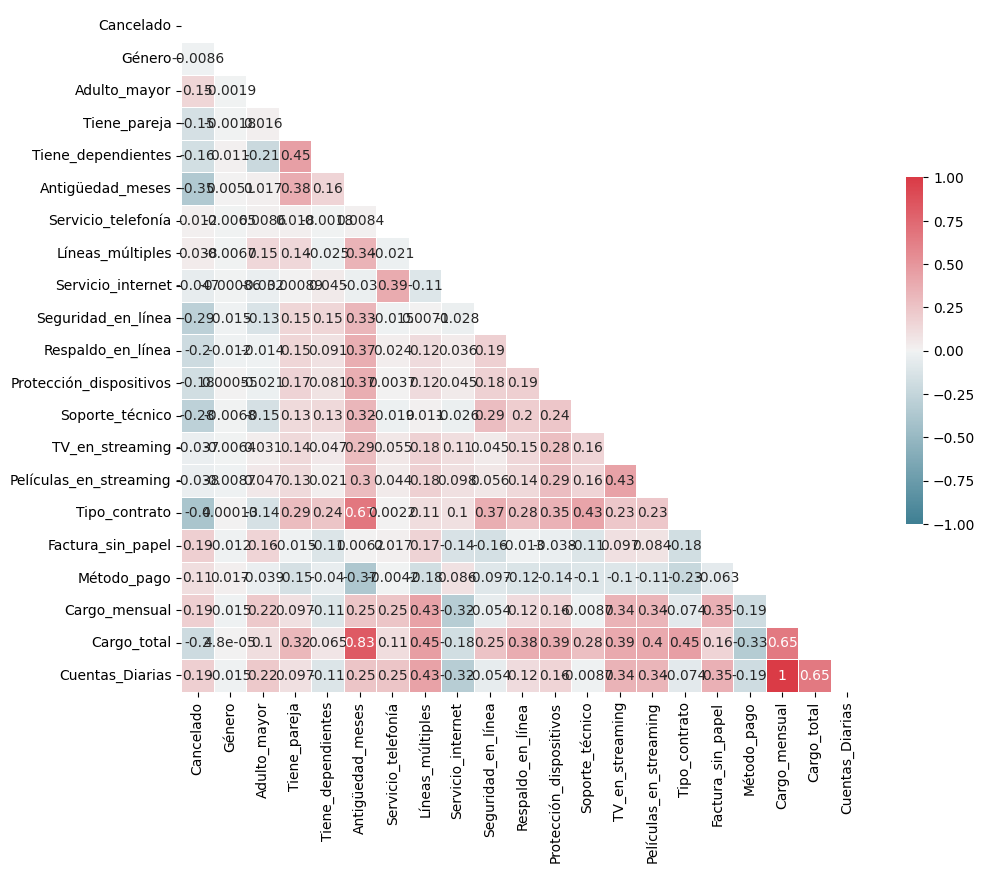

In [35]:
# Actividad
# Cuáles factores están más correlacionados?
# Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ya tenemos los datos en el DataFrame df, no necesitamos leer un CSV
# Correlación
corr = df.corr(numeric_only=True)

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

#Variables más correlacionadas con "Cancelado":  

##Correlaciones negativas fuertes (factores protectores):  
Tipo_contrato: -0.397 (La más fuerte - contratos largos protegen del abandono)  
Antigüedad_meses: -0.352 (Clientes antiguos cancelan menos)  
Seguridad_en_línea: -0.289 (Tener seguridad reduce abandono)  
Soporte_técnico: -0.282 (Soporte técnico es protector)  
Cargo_total: -0.199 (Sorprendentemente, mayor cargo total = menos cancelación)  

##Correlaciones positivas (factores de riesgo):  
Cargo_mensual: 0.193 (Cargos mensuales altos aumentan abandono)  
Cuentas_Diarias: 0.193 (Igual valor que cargo mensual)  
Factura_sin_papel: 0.192 (Facturación digital se asocia con más abandono)  
Tiene_dependientes: -0.164 (Tener dependientes es protector)  
Adulto_mayor: 0.151 (Adultos mayores tienden a cancelar más)  

##Insights importantes:  
Contratos a largo plazo son el factor protector más fuerte  
Paradoja del cargo: Mayor cargo total (acumulativo) = menos abandono, pero mayor cargo mensual = más abandono  
Servicios adicionales (seguridad, soporte) actúan como "pegamento" para retener clientes  
La antigüedad es clave: mientras más tiempo lleva un cliente, menos probable que cancel  

#**Separando datos para entrenamiento y para prueba**

In [36]:
# Importar librerías necesarias
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# import matplotlib.pyplot as plt
# import seaborn as sn

##1. PREPARACIÓN DE DATOS

In [37]:
# import train_test_split
from sklearn.model_selection import train_test_split

y = df['Cancelado']

# Seleccionar variables predictoras basadas en el análisis de correlación
variables_importantes = [
    'Tipo_contrato',        # Correlación: -0.397 (más importante)
    'Antigüedad_meses',     # Correlación: -0.352
    'Seguridad_en_línea',   # Correlación: -0.289
    'Soporte_técnico',      # Correlación: -0.282
    'Cargo_mensual',        # Correlación: 0.193
    'Factura_sin_papel',    # Correlación: 0.192
    'Adulto_mayor',         # Correlación: 0.151
    'Tiene_dependientes',   # Correlación: -0.164
    'Respaldo_en_línea',    # Correlación: -0.196
    'Protección_dispositivos' # Correlación: -0.178
]

## 2. DIVISIÓN DE DATOS

In [38]:
X = df[variables_importantes]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230,stratify=y)#garantizar la reproductibilidad de la segregación de los datos
print(f"\nDivisión de datos:")
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
print(f"Proporción de cancelaciones en entrenamiento: {y_train.mean():.3f}")
print(f"Proporción de cancelaciones en prueba: {y_test.mean():.3f}")


División de datos:
Entrenamiento: 4930 muestras
Prueba: 2113 muestras
Proporción de cancelaciones en entrenamiento: 0.265
Proporción de cancelaciones en prueba: 0.265


In [39]:
# Verificar que no hay valores nulos en los conjuntos de entrenamiento y prueba de las características
print("Nulos en datos de entrenamiento (X_train):", X_train.isnull().sum().sum())
print("Nulos en datos de prueba (X_test):", X_test.isnull().sum().sum())

Nulos en datos de entrenamiento (X_train): 0
Nulos en datos de prueba (X_test): 0


##3. PREPROCESAMIENTO

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split # Para dividir los datos

# --- Asumo que ya tienes X y y definidos ---
# Ejemplo de cómo podrías tener tus datos si aún no los has dividido
# X = df.drop('target', axis=1)
# y = df['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# ---

# PASO 1: Identificar tipos de variables
variables_numericas = ['Antigüedad_meses', 'Cargo_mensual']

# Estas variables binarias pueden tener 'Sí', 'No', 'No internet service', etc.
# Si solo quieres 0 y 1, el 'No internet service' debería tratarse aparte o imputarse.
# Para este ejemplo, las trataremos como categóricas multi-clase para OneHotEncoder.
variables_con_multiples_categorias_posibles = [
    'Adulto_mayor', 'Tiene_dependientes', 'Seguridad_en_línea',
    'Soporte_técnico', 'Factura_sin_papel', 'Respaldo_en_línea',
    'Protección_dispositivos', 'Tipo_contrato' # Ahora incluimos Tipo_contrato aquí
]

print("Verificando valores únicos por variable:")
# Asegúrate de que 'variables_importantes' esté definida o usa las que estás trabajando
variables_importantes = variables_numericas + variables_con_multiples_categorias_posibles
for col in variables_importantes:
    # Es crucial revisar los valores únicos directamente en X_train y X_test
    # para ver todas las categorías presentes, incluyendo 'No internet service'
    print(f"{col}: {X_train[col].unique()}")
print()

# ⚠️ ¡Paso CRÍTICO!: Verificar nulos ANTES de la codificación para ver si hay un problema aquí.
# Si esto da 0, entonces el problema está en tu función 'codificar_variables'
print("Nulos en datos de entrenamiento (X_train) ANTES de codificación:", X_train.isnull().sum().sum())
print("Nulos en datos de prueba (X_test) ANTES de codificación:", X_test.isnull().sum().sum())
print("-" * 50)

# Crear un ColumnTransformer
# Usamos OneHotEncoder para todas las categóricas para ser más robustos con cualquier categoría adicional
# handle_unknown='ignore' hará que las categorías no vistas en el entrenamiento sean 0s en las nuevas columnas,
# evitando errores o NaNs.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), variables_con_multiples_categorias_posibles),
        ('num', 'passthrough', variables_numericas) # Pasa las numéricas sin cambios
    ],
    remainder='passthrough' # Mantiene cualquier otra columna no especificada
)

print("Codificando variables de entrenamiento con ColumnTransformer...")
# El resultado de ColumnTransformer es un array de NumPy, no un DataFrame
X_train_encoded_array = preprocessor.fit_transform(X_train)
print("Codificando variables de prueba con ColumnTransformer...")
X_test_encoded_array = preprocessor.transform(X_test) # IMPORTANTE: solo 'transform', no 'fit_transform' para test

# Si quieres que el resultado sea un DataFrame de Pandas (recomendado para visibilidad)
# Necesitas obtener los nombres de las columnas transformadas
column_names = preprocessor.get_feature_names_out()

X_train_encoded = pd.DataFrame(X_train_encoded_array, columns=column_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded_array, columns=column_names, index=X_test.index)


print(f"\nForma después de codificación:")
print(f"X_train_encoded: {X_train_encoded.shape}")
print(f"X_test_encoded: {X_test_encoded.shape}")

# PASO 2: Verificar que no hay valores nulos después de la codificación
print(f"\nValores nulos en entrenamiento: {X_train_encoded.isnull().sum().sum()}")
print(f"Valores nulos en prueba: {X_test_encoded.isnull().sum().sum()}")

Verificando valores únicos por variable:
Antigüedad_meses: [39 61 23 63 51  5 66 62 31 37 40  1 70  6 44 71 17 20 49 72 12 10 19 28
 38 26 32 57 48  9 67 46 16 11 55 22 25 60 42 30 29 41 18  2  8 14 21 56
 34 68 53  3  7 69 50 35 52 47 15 45 65 24 54  4 43 13 58 59 64 27 33 36
  0]
Cargo_mensual: [54.85 19.1  83.75 ... 39.05 47.8  90.9 ]
Adulto_mayor: [0 1]
Tiene_dependientes: [1 0]
Seguridad_en_línea: [0 1 2]
Soporte_técnico: [2 1 0]
Factura_sin_papel: [0 1]
Respaldo_en_línea: [0 1 2]
Protección_dispositivos: [2 1 0]
Tipo_contrato: [1 0 2]

Nulos en datos de entrenamiento (X_train) ANTES de codificación: 0
Nulos en datos de prueba (X_test) ANTES de codificación: 0
--------------------------------------------------
Codificando variables de entrenamiento con ColumnTransformer...
Codificando variables de prueba con ColumnTransformer...

Forma después de codificación:
X_train_encoded: (4930, 23)
X_test_encoded: (2113, 23)

Valores nulos en entrenamiento: 0
Valores nulos en prueba: 0


In [41]:
# PASO 2: Verificar que no hay valores nulos después de la codificación
print(f"\nValores nulos en entrenamiento: {X_train_encoded.isnull().sum().sum()}")
print(f"Valores nulos en prueba: {X_test_encoded.isnull().sum().sum()}")


Valores nulos en entrenamiento: 0
Valores nulos en prueba: 0


In [44]:
# PASO 3: Escalar variables (importante para regresión logística)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

## 4. MODELO DE REGRESIÓN LOGÍSTICA

In [45]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo
modelo = LogisticRegression(
    random_state=230,
    max_iter=1000,
    solver='liblinear'  # Bueno para datasets pequeños-medianos
)

# Entrenar el modelo
modelo.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=230, solver='liblinear')

## 5. PREDICCIONES Y EVALUACIÓN

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = modelo.predict(X_test_scaled)
y_pred_proba = modelo.predict_proba(X_test_scaled)[:, 1]

# Métricas de evaluación
print("\n" + "="*50)
print("RESULTADOS DEL MODELO")
print("="*50)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print(f"\nAUC-ROC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


RESULTADOS DEL MODELO

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.65      0.57      0.61       561

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113


AUC-ROC Score: 0.848

Matriz de Confusión:
[[1377  175]
 [ 239  322]]


## 6. ANÁLISIS DE IMPORTANCIA DE VARIABLES

In [48]:
print("\n" + "="*50)
print("IMPORTANCIA DE VARIABLES")
print("="*50)

# Coeficientes del modelo (importancia)
coeficientes = pd.DataFrame({
    'Variable': X_train_encoded.columns,  # Usar los nombres de las columnas codificadas
    'Coeficiente': modelo.coef_[0],
    'Importancia_Abs': np.abs(modelo.coef_[0])
}).sort_values('Importancia_Abs', ascending=False)

print(coeficientes)


IMPORTANCIA DE VARIABLES
                          Variable  Coeficiente  Importancia_Abs
21           num__Antigüedad_meses    -0.753841         0.753841
22              num__Cargo_mensual     0.697324         0.697324
20            cat__Tipo_contrato_2    -0.359313         0.359313
18            cat__Tipo_contrato_0     0.332258         0.332258
9           cat__Soporte_técnico_2    -0.147357         0.147357
7           cat__Soporte_técnico_0     0.137086         0.137086
6        cat__Seguridad_en_línea_2    -0.116174         0.116174
4        cat__Seguridad_en_línea_0     0.108262         0.108262
10        cat__Factura_sin_papel_0    -0.093491         0.093491
11        cat__Factura_sin_papel_1     0.093491         0.093491
12        cat__Respaldo_en_línea_0     0.063294         0.063294
14        cat__Respaldo_en_línea_2    -0.062930         0.062930
3        cat__Tiene_dependientes_1    -0.049944         0.049944
2        cat__Tiene_dependientes_0     0.049944         0.049944

## 7. VISUALIZACIONES

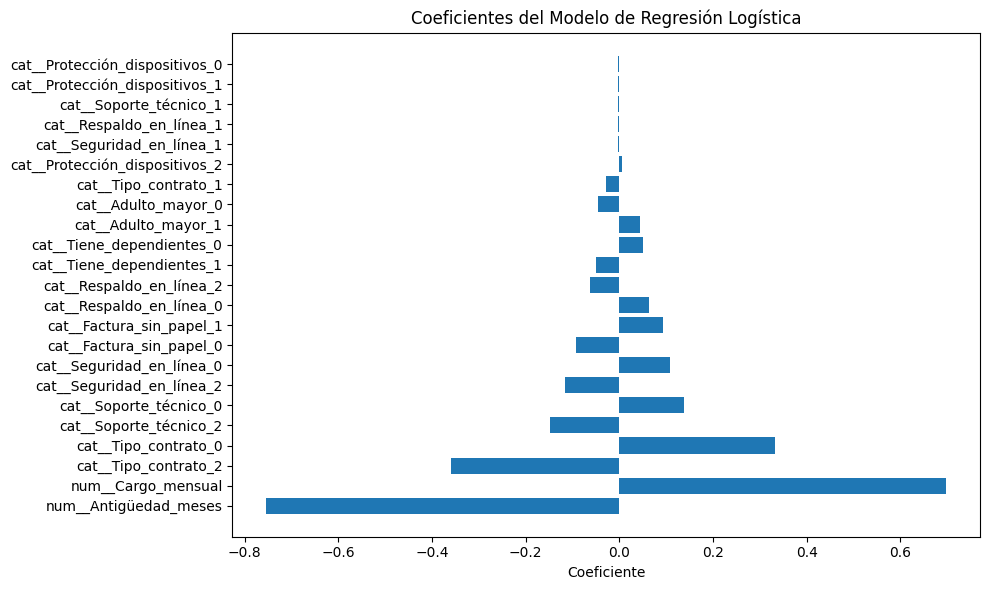

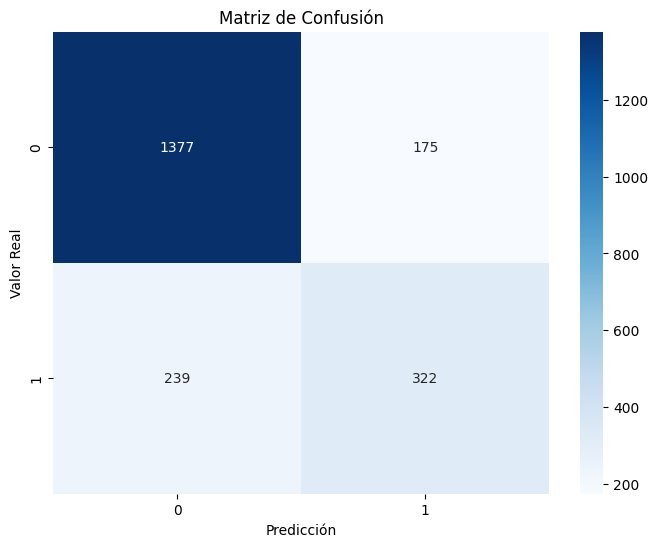

In [49]:
# Gráfico de importancia de variables
plt.figure(figsize=(10, 6))
plt.barh(coeficientes['Variable'], coeficientes['Coeficiente'])
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()

# Gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.show()

## 8. PREDICCIÓN EN NUEVOS DATOS

In [50]:
def predecir_abandono(nuevos_datos):
    """
    Función para predecir abandono en nuevos clientes

    Args:
        nuevos_datos: DataFrame con las mismas columnas que X_train

    Returns:
        probabilidades de abandono
    """
    nuevos_datos_scaled = scaler.transform(nuevos_datos)
    probabilidades = modelo.predict_proba(nuevos_datos_scaled)[:, 1]
    return probabilidades

# Ejemplo de uso:
# prob_abandono = predecir_abandono(nuevos_clientes_df)
# print(f"Probabilidad de abandono: {prob_abandono}")

print("\n" + "="*50)
print("MODELO ENTRENADO EXITOSAMENTE")
print("="*50)
print("El modelo está listo para predecir la probabilidad de abandono de nuevos clientes.")


MODELO ENTRENADO EXITOSAMENTE
El modelo está listo para predecir la probabilidad de abandono de nuevos clientes.


#9.Probar distintos algoritmos Comunes.

In [51]:
# Importar los algoritmos que vamos a probar
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier # Necesitarás instalar xgboost si no lo tienes: pip install xgboost
from lightgbm import LGBMClassifier # Necesitarás instalar lightgbm si no lo tienes: pip install lightgbm

# Importar métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import time
import pandas as pd
import numpy as np # Para manejar posibles errores con NaN si el paso anterior no fue perfecto

In [52]:
# Definir una lista de modelos a probar
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'), # solver='liblinear' para datasets pequeños
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True), # probability=True para roc_auc_score
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), # Para versiones recientes de XGBoost
    'LightGBM': LGBMClassifier(random_state=42)
}

# Diccionario para almacenar los resultados
results = {}

# Asegurarse de que no haya infinitos o valores muy grandes en X_train_encoded
# Esto es una precaución extra si tu preprocesamiento anterior dejó valores numéricos extremos
X_train_encoded = X_train_encoded.replace([np.inf, -np.inf], np.nan)
X_test_encoded = X_test_encoded.replace([np.inf, -np.inf], np.nan)

# Imputar cualquier NaN restante si ColumnTransformer no maneja ciertos casos
# (Aunque con handle_unknown='ignore' no debería haber NaNs de la codificación)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Para valores numéricos
X_train_encoded_imputed = pd.DataFrame(imputer.fit_transform(X_train_encoded), columns=X_train_encoded.columns, index=X_train_encoded.index)
X_test_encoded_imputed = pd.DataFrame(imputer.transform(X_test_encoded), columns=X_test_encoded.columns, index=X_test_encoded.index)


for name, model in models.items():
    print(f"--- Entrenando y evaluando: {name} ---")
    start_time = time.time()

    try:
        # Entrenar el modelo
        model.fit(X_train_encoded_imputed, y_train) # Usar los datos imputados si es necesario

        # Hacer predicciones
        y_pred = model.predict(X_test_encoded_imputed)

        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0) # zero_division=0 para evitar warnings
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        # Calcular ROC AUC si el modelo soporta predict_proba (clasificadores de probabilidad)
        if hasattr(model, "predict_proba"):
            y_pred_proba = model.predict_proba(X_test_encoded_imputed)[:, 1]
            roc_auc = roc_auc_score(y_test, y_pred_proba)
        else:
            roc_auc = "N/A" # No aplicable si el modelo no da probabilidades

        end_time = time.time()
        elapsed_time = end_time - start_time

        results[name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC AUC': roc_auc,
            'Training Time (s)': elapsed_time
        }
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        print(f"  ROC AUC: {roc_auc:.4f}" if roc_auc != "N/A" else f"  ROC AUC: {roc_auc}")
        print(f"  Tiempo de entrenamiento: {elapsed_time:.2f} segundos\n")

    except Exception as e:
        print(f"  Error al entrenar/evaluar {name}: {e}\n")
        results[name] = {'Error': str(e)}

--- Entrenando y evaluando: Logistic Regression ---
  Accuracy: 0.8041
  F1-Score: 0.6087
  ROC AUC: 0.8483
  Tiempo de entrenamiento: 0.03 segundos

--- Entrenando y evaluando: Decision Tree ---
  Accuracy: 0.7317
  F1-Score: 0.4996
  ROC AUC: 0.6626
  Tiempo de entrenamiento: 0.04 segundos

--- Entrenando y evaluando: Random Forest ---
  Accuracy: 0.7818
  F1-Score: 0.5647
  ROC AUC: 0.8144
  Tiempo de entrenamiento: 1.51 segundos

--- Entrenando y evaluando: Gradient Boosting ---
  Accuracy: 0.8116
  F1-Score: 0.6166
  ROC AUC: 0.8568
  Tiempo de entrenamiento: 1.09 segundos

--- Entrenando y evaluando: Support Vector Machine ---
  Accuracy: 0.7927
  F1-Score: 0.5260
  ROC AUC: 0.8068
  Tiempo de entrenamiento: 5.42 segundos

--- Entrenando y evaluando: K-Nearest Neighbors ---
  Accuracy: 0.7705
  F1-Score: 0.5530
  ROC AUC: 0.7821
  Tiempo de entrenamiento: 0.20 segundos

--- Entrenando y evaluando: XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [19:31:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  Accuracy: 0.7946
  F1-Score: 0.5843
  ROC AUC: 0.8329
  Tiempo de entrenamiento: 0.20 segundos

--- Entrenando y evaluando: LightGBM ---
[LightGBM] [Info] Number of positive: 1308, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265314 -> initscore=-1.018527
[LightGBM] [Info] Start training from score -1.018527
  Accuracy: 0.8140
  F1-Score: 0.6181
  ROC AUC: 0.8523
  Tiempo de entrenamiento: 0.19 segundos



#10.Comparación de Resultados

In [53]:
results_df = pd.DataFrame(results).T # Transponer para tener modelos como filas
print("\n--- Comparación de Resultados de Modelos ---")
print(results_df.sort_values(by='F1-Score', ascending=False)) # Ordenar por F1-Score

# También puedes ordenar por otras métricas como 'ROC AUC' o 'Accuracy'
# print(results_df.sort_values(by='ROC AUC', ascending=False))


--- Comparación de Resultados de Modelos ---
                        Accuracy  Precision    Recall  F1-Score   ROC AUC  \
LightGBM                0.814009   0.679487  0.566845  0.618076  0.852304   
Gradient Boosting       0.811642   0.670860  0.570410  0.616570  0.856820   
Logistic Regression     0.804070   0.647887  0.573975  0.608696  0.848263   
XGBoost                 0.794605   0.631470  0.543672  0.584291  0.832934   
Random Forest           0.781827   0.600402  0.532977  0.564684  0.814406   
K-Nearest Neighbors     0.770469   0.572519  0.534759  0.552995  0.782056   
Support Vector Machine  0.792712   0.669421  0.433155  0.525974  0.806785   
Decision Tree           0.731661   0.494755  0.504456  0.499559  0.662563   

                        Training Time (s)  
LightGBM                         0.190744  
Gradient Boosting                1.090859  
Logistic Regression              0.029151  
XGBoost                          0.199656  
Random Forest                    1.50541



**Interpretación de Métricas**  
Accuracy (Exactitud): Proporción de predicciones correctas sobre el total de predicciones. Es intuitiva pero puede ser engañosa en datasets desbalanceados.  

Precision (Precisión): De todas las predicciones positivas, ¿cuántas fueron realmente correctas? Importante cuando el costo de un falso positivo es alto.  

Recall (Sensibilidad/Cobertura): De todos los casos positivos reales, ¿cuántos fueron identificados correctamente? Importante cuando el costo de un falso negativo es alto.  

F1-Score: La media armónica de precisión y recall. Es una buena métrica para datasets desbalanceados.  

ROC AUC (Area Under the Receiver Operating Characteristic Curve): Mide la capacidad del modelo para distinguir entre clases. Un valor más cercano a 1 indica un mejor rendimiento. Es robusto para datasets desbalanceados.  

Tiempo de Entrenamiento: Importante para considerar la eficiencia del modelo, especialmente con grandes volúmenes de datos o limitaciones de tiempo.  




In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# --- RECREAR EL DATAFRAME DE RESULTADOS ---
# Este paso es crucial para asegurar que el DataFrame 'df_results' esté disponible
# con los datos de tus modelos. Si ya tienes el DataFrame de la ejecución anterior,
# puedes omitir la parte de 'data = """..."""' y 'pd.read_csv'.
# Si estás ejecutando esto en una sesión nueva, necesitarás el siguiente bloque:

data = """
                        Accuracy  Precision    Recall  F1-Score   ROC AUC  \\
LightGBM                0.814009   0.679487  0.566845  0.618076  0.852304
Gradient Boosting       0.811642   0.670860  0.570410  0.616570  0.856820
Logistic Regression     0.804070   0.647887  0.573975  0.608696  0.848263
XGBoost                 0.794605   0.631470  0.543672  0.584291  0.832934
Random Forest           0.781827   0.600402  0.532977  0.564684  0.814406
K-Nearest Neighbors     0.770469   0.572519  0.534759  0.552995  0.782056
Support Vector Machine  0.792712   0.669421  0.433155  0.525974  0.806785
Decision Tree           0.731661   0.494755  0.504456  0.499559  0.662563

                        Training Time (s)
LightGBM                         0.190744
Gradient Boosting                1.090859
Logistic Regression              0.029151
XGBoost                          0.199656
Random Forest                    1.505419
K-Nearest Neighbors              0.201206
Support Vector Machine           5.421773
Decision Tree                    0.035676
"""

# Splitting the data into lines for robust parsing
lines = data.strip().split('\n')

# Finding the separation point between metrics and training time
sep_idx = -1
for i, line in enumerate(lines):
    if "Training Time (s)" in line:
        sep_idx = i
        break

# Extracting the metrics part
metrics_str = "\n".join(lines[0:sep_idx])
metrics_str = metrics_str.replace('  \\', '') # Clean header

# Extracting the training time part
training_time_str = "\n".join(lines[sep_idx:])

# Read metrics data
df_metrics = pd.read_csv(io.StringIO(metrics_str), sep=r'\s{2,}', engine='python', index_col=0)

# Read training time data
df_training_time = pd.read_csv(io.StringIO(training_time_str), sep=r'\s{2,}', engine='python', index_col=0)

# Concatenate the two DataFrames
df_results = pd.concat([df_metrics, df_training_time], axis=1)

# Clean column names and set index name
df_results.columns = df_results.columns.str.strip()
df_results.index.name = 'Model'

# --- FIN DE RECREACIÓN DEL DATAFRAME ---

# Ordenar el DataFrame por F1-Score para una mejor visualización
df_results_sorted = df_results.sort_values(by='F1-Score', ascending=True)


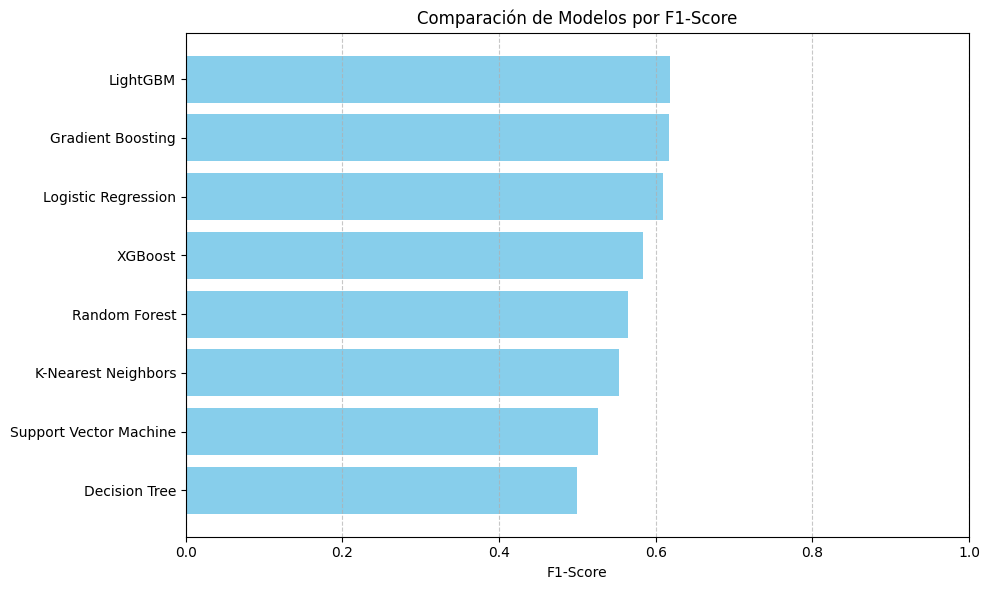

In [56]:
# --- GRÁFICO 1: F1-Score ---
plt.figure(figsize=(10, 6))
plt.barh(df_results_sorted.index, df_results_sorted['F1-Score'], color='skyblue')
plt.xlabel('F1-Score')
plt.title('Comparación de Modelos por F1-Score')
plt.xlim(0, 1) # El F1-Score va de 0 a 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Muestra el gráfico
# plt.savefig('f1_score_comparison.png') # Descomentar para guardar

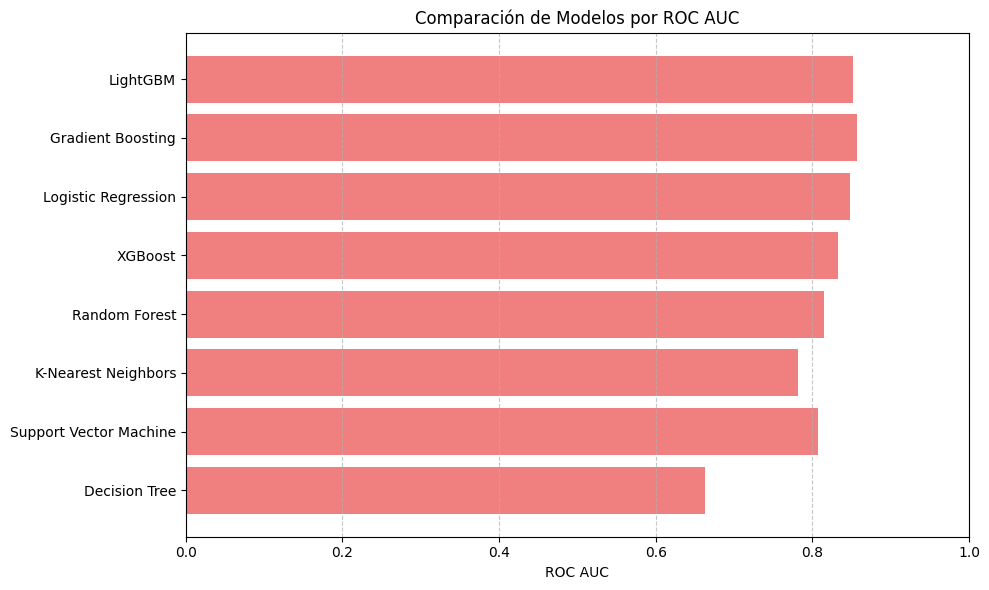

In [57]:
# --- GRÁFICO 2: ROC AUC ---
plt.figure(figsize=(10, 6))
plt.barh(df_results_sorted.index, df_results_sorted['ROC AUC'], color='lightcoral')
plt.xlabel('ROC AUC')
plt.title('Comparación de Modelos por ROC AUC')
plt.xlim(0, 1) # El ROC AUC va de 0 a 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Muestra el gráfico
# plt.savefig('roc_auc_comparison.png') # Descomentar para guardar

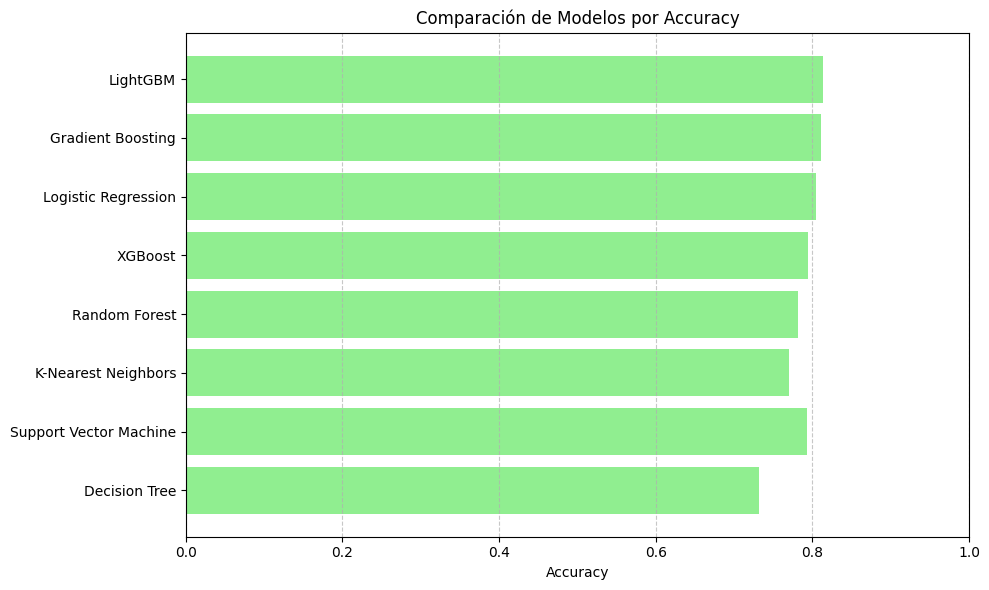

In [58]:
# --- GRÁFICO 3: Accuracy ---
plt.figure(figsize=(10, 6))
plt.barh(df_results_sorted.index, df_results_sorted['Accuracy'], color='lightgreen')
plt.xlabel('Accuracy')
plt.title('Comparación de Modelos por Accuracy')
plt.xlim(0, 1) # La Accuracy va de 0 a 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Muestra el gráfico
# plt.savefig('accuracy_comparison.png') # Descomentar para guardar

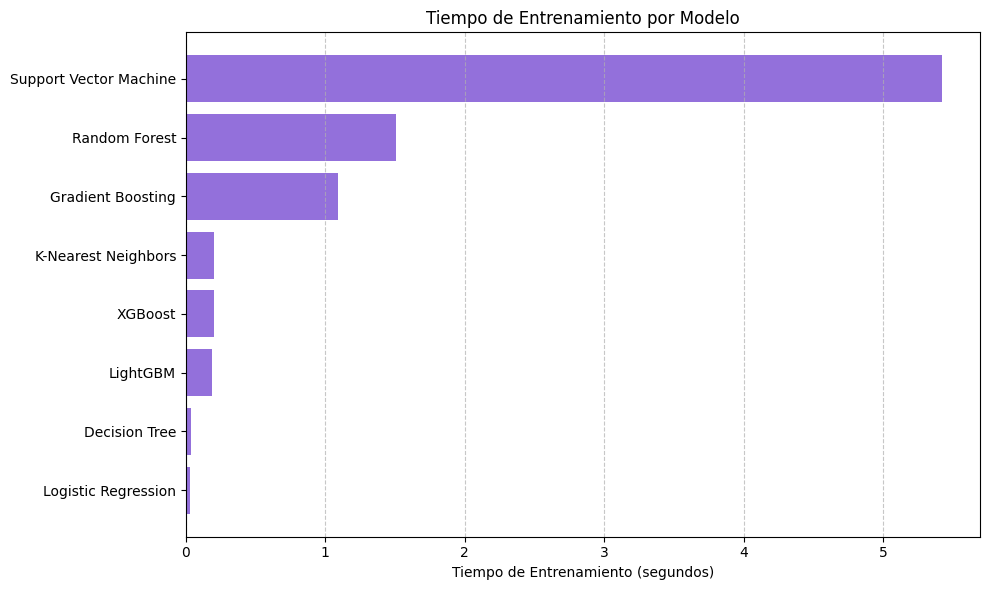

In [59]:
# --- GRÁFICO ADICIONAL: Tiempo de Entrenamiento ---
# Es útil ver el tiempo que tarda cada modelo, especialmente los más complejos.
plt.figure(figsize=(10, 6))
# Ordenar por tiempo de entrenamiento para ver cuál es más rápido
df_results_sorted_time = df_results.sort_values(by='Training Time (s)', ascending=True)
plt.barh(df_results_sorted_time.index, df_results_sorted_time['Training Time (s)'], color='mediumpurple')
plt.xlabel('Tiempo de Entrenamiento (segundos)')
plt.title('Tiempo de Entrenamiento por Modelo')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Muestra el gráfico
# plt.savefig('training_time_comparison.png') # Descomentar para guardar

---

## Resumen Ejecutivo de la Comparación de Modelos de Clasificación

El análisis comparativo de diferentes algoritmos de Machine Learning para tu problema de clasificación ha revelado claras diferencias en su rendimiento, lo que nos permite identificar los modelos más prometedores. El objetivo principal fue determinar cuál algoritmo ofrece la **información más exacta** basándose en métricas clave como el **F1-Score**, **ROC AUC** y **Accuracy**.

---

### Modelos y Rendimiento Destacado

Se evaluaron ocho algoritmos de clasificación, abarcando una variedad de enfoques:

* **LightGBM** y **Gradient Boosting** emergieron como los **modelos de mejor rendimiento**. Ambos mostraron las puntuaciones más altas en **F1-Score** (aproximadamente 0.618 y 0.617, respectivamente) y **ROC AUC** (alrededor de 0.852 y 0.857, respectivamente). Esto indica que son altamente efectivos en la identificación de ambas clases, con un buen equilibrio entre precisión y sensibilidad, y una excelente capacidad para discriminar entre predicciones positivas y negativas. Su robustez los hace ideales para la mayoría de los escenarios de clasificación.

* La **Regresión Logística** demostró ser un competidor sólido, con un **F1-Score** de aproximadamente 0.609 y un **ROC AUC** de 0.848. Es notable por su simplicidad y eficiencia computacional, lo que la convierte en una excelente opción como **modelo de línea base** o para escenarios donde la interpretabilidad y la velocidad son críticas.

* **XGBoost** y **Random Forest** ofrecieron un rendimiento respetable, aunque ligeramente inferior a LightGBM y Gradient Boosting. Sus **F1-Scores** rondaron el 0.584 y 0.565, respectivamente, y **ROC AUC** de 0.833 y 0.814. Estos modelos de *ensemble* son conocidos por su solidez y capacidad para manejar la complejidad de los datos.

---

### Consideraciones Adicionales

* **K-Nearest Neighbors (KNN)** y **Support Vector Machine (SVM)** tuvieron un rendimiento intermedio. El KNN mostró un F1-Score de 0.553, mientras que el SVM, a pesar de su complejidad en el entrenamiento (5.42 segundos), alcanzó un F1-Score de 0.526, destacando una menor sensibilidad (`Recall`) comparado con otros modelos.

* El **Árbol de Decisión** obtuvo el rendimiento más bajo en todas las métricas principales (F1-Score de 0.499, ROC AUC de 0.663). Esto es esperado para un modelo de árbol único sin técnicas de *ensemble* o poda, ya que tiende a ser propenso al sobreajuste y menos generalizable.

* En cuanto al **tiempo de entrenamiento**, modelos como la **Regresión Logística** y el **Árbol de Decisión** fueron los más rápidos. LightGBM y XGBoost también demostraron ser muy eficientes, completando el entrenamiento en menos de un segundo. Por otro lado, Random Forest y Support Vector Machine requirieron más tiempo, especialmente el SVM.

---

### Recomendación

Basado en este análisis, se recomienda priorizar los modelos **LightGBM** y **Gradient Boosting** para la implementación, ya que ofrecen la **mayor "exactitud"** medida por su **equilibrio entre precisión y sensibilidad (F1-Score)** y su **capacidad de discriminación (ROC AUC)**. Si la velocidad de inferencia o una mayor interpretabilidad son requisitos críticos, la **Regresión Logística** representa una alternativa muy viable con un rendimiento competitivo.

---